In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c, epsilon_0;
from scipy.interpolate import interp1d;
from scipy.signal import savgol_filter;
import sys;
sys.path.insert(0, "../../python");
sys.path.insert(0, "../current_profiles/");
from laser import laser;
from crystal import crystal;
from ebeam import ebeam;
import thz;
import phase_retard;
from importlib import reload as rel;
from plotting import makefig;
import current_profiles as cp;
# Simulation parameters

# Electron bunch
Q      = 1.5e-9;
sigz   = 5.2e-6; 
del_z  = 150e-6;
N      = 8000;
dt     = (sigz / c) / 10;
t      = np.linspace(-N * dt / 2, N * dt / 2, N); 
r0     = 5e-3;
# Crystal
d      = 25.0e-6;
nslice = 100;

# Laser
y0 = 800e-9;
dy = 27e-9;
tp = 30e-15;
# Initialize probe, crystals, and beam
probe  = laser({'y0' : y0, 'dy' : dy, 'tp' : tp})
gap    = crystal('gap');
znte   = crystal('znte');
drive  = ebeam({'Q' : Q, 'sigz' : sigz, 'del_z' : 0, 't' : t, 'r0' : r0});
wit    = ebeam({'Q' : Q / 3, 'sigz' : sigz, 'del_z' : del_z, 't' : t, 'r0' : r0})
Er     = drive.Er + wit.Er

# Crytsal array
j     = np.arange(1, nslice, 1);
dz    = d / nslice;
d_arr = (j - 0.5) * dz;

# Probe absolute time
tau   = np.linspace(-1000, 2000, 1000) * 1e-15;
# Chirp probe pulse
tc    = 2e-12;
probe.chirp(tc);

In [2]:
#I, ti, zi, dzi, dti = cp.get_current(0);
#E, ze, te = cp.get_E(I, ti, zi, 5e-3);
#E = savgol_filter(E, window_length = 51, polyorder = 3)
#E[E < 0] = 0;
#E = np.flip(E, axis = 0);
#te = te - te[np.argmax(E)]

In [3]:
FEr_drive, f = thz.raw_field(drive.Er, drive.t, plot = False);
FEr_wit, f   = thz.raw_field(wit.Er, wit.t, plot = False);
FEr, f       = thz.raw_field(Er, drive.t, plot = False);

../../python\crystal.py:197: RuntimeWarning: divide by zero encountered in true_divide
  y_arr = (c / f); # m


THz phase velocity: nan c
THz group velocity: nan c
Probe group velocity: 0.11 c
Probe shift: 0.72 ps


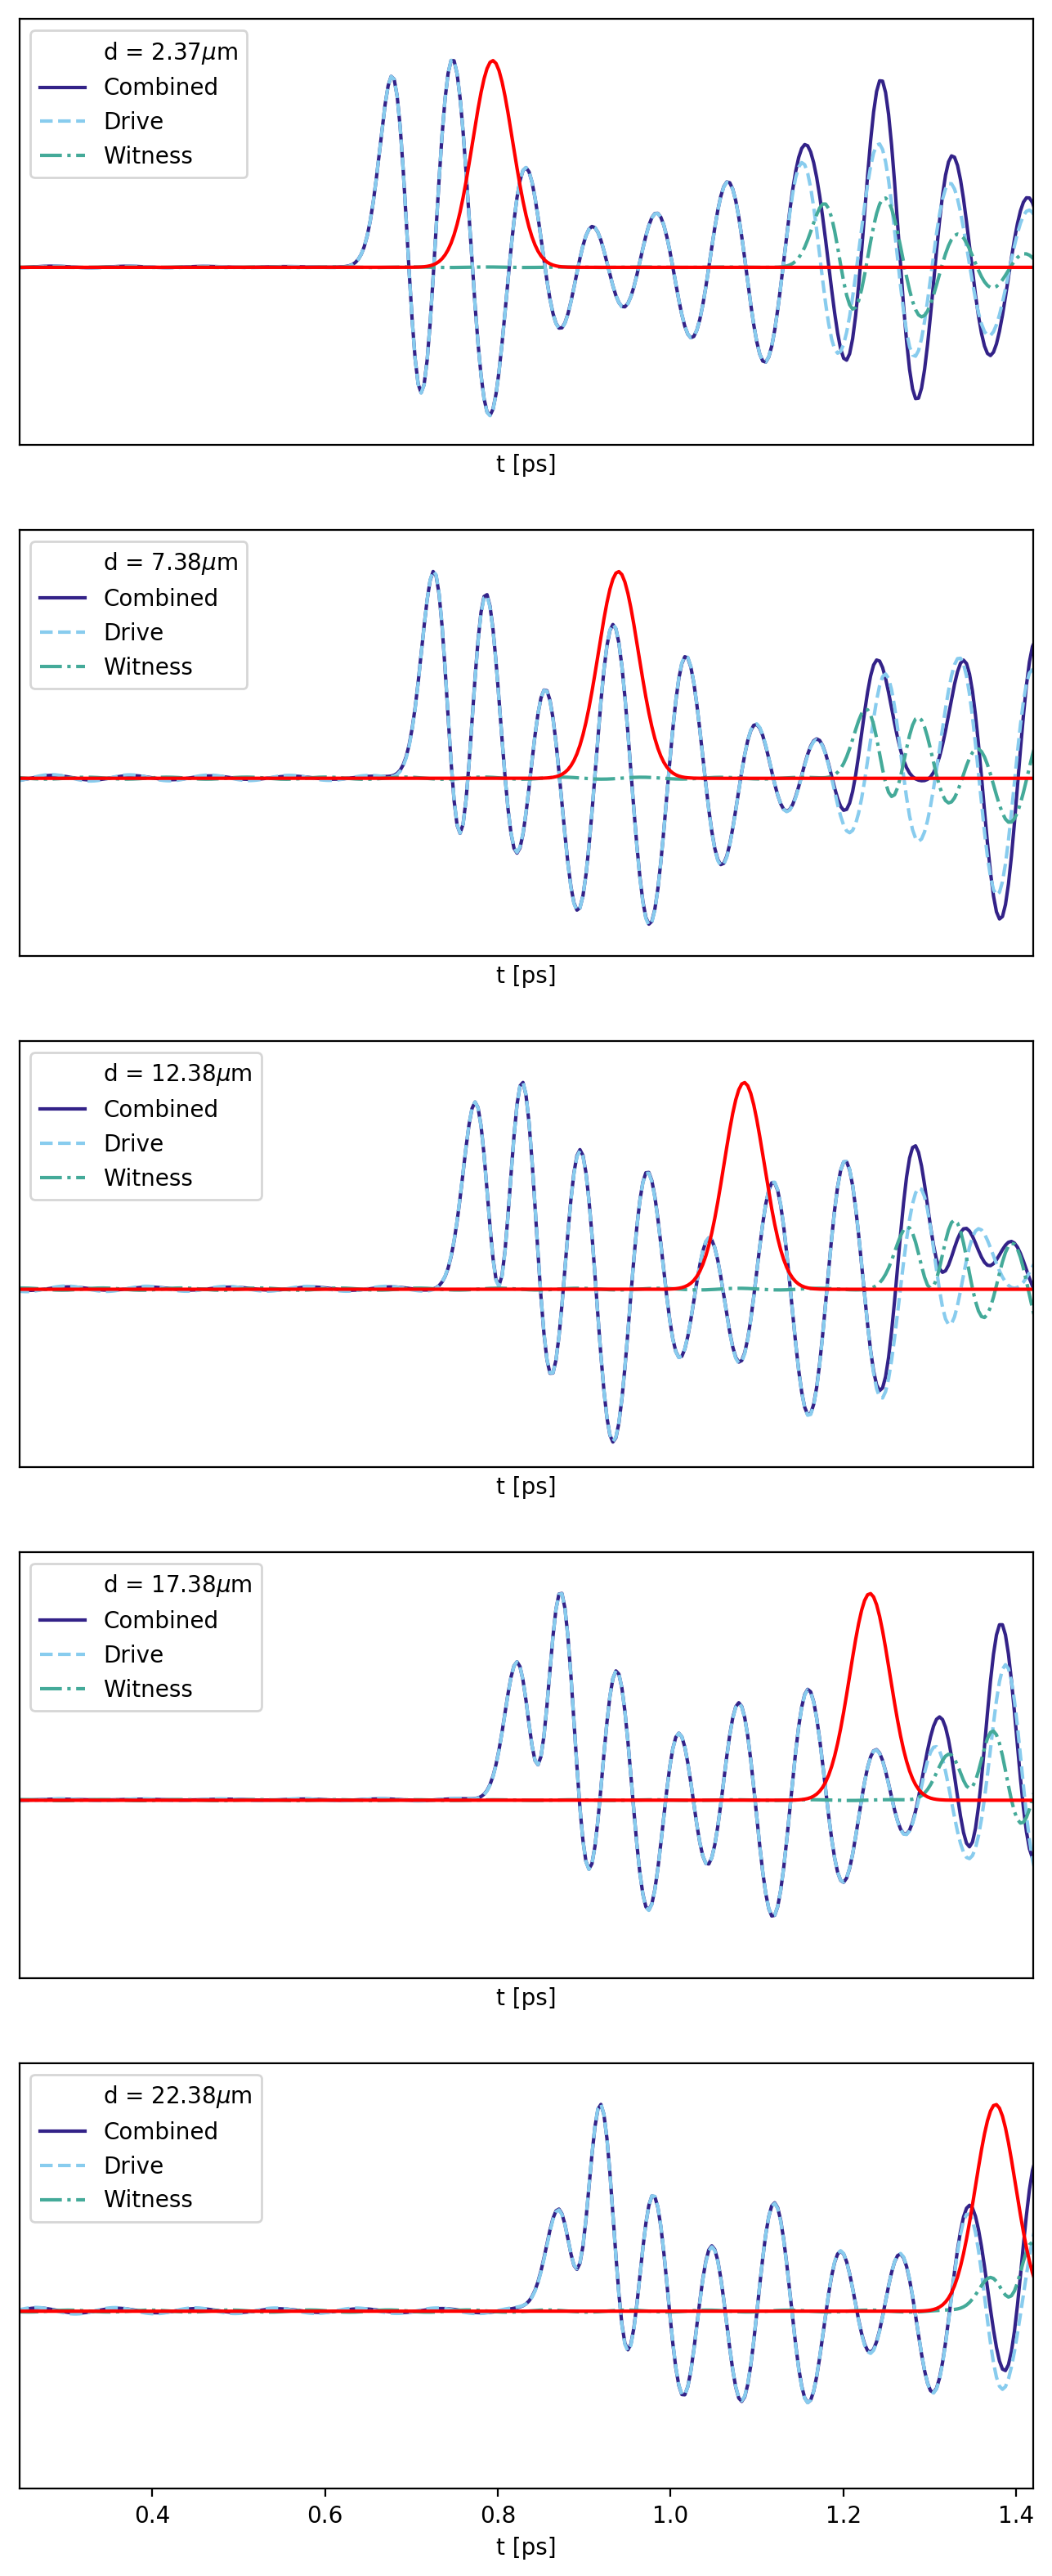

In [4]:
# Compute Field in crystal
#%matplotlib tk
Ec_drive, Ec_wit, Ec, tt = thz.cry_two_field(drive.t, FEr_drive, FEr_wit, FEr, f, d, probe, gap, \
                                             nslice = nslice, plot = True, verbose = True);

In [5]:
j     = np.arange(1, nslice, 1);
dz    = d / nslice;
d_arr = (j - 0.5) * dz;

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


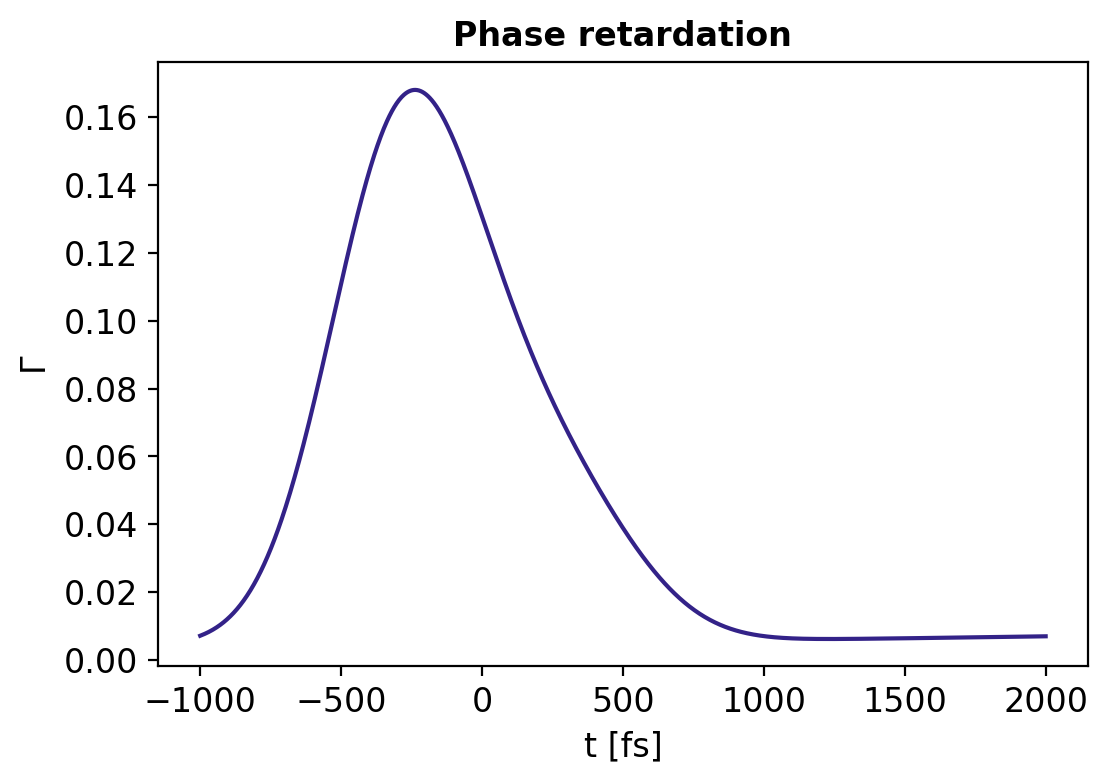

In [6]:
gamma_drive, t_gamma = phase_retard.phase_retard(Ec_drive, tt*1e-12, d_arr, tau, probe, gap, 'chirp', plot = True);

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


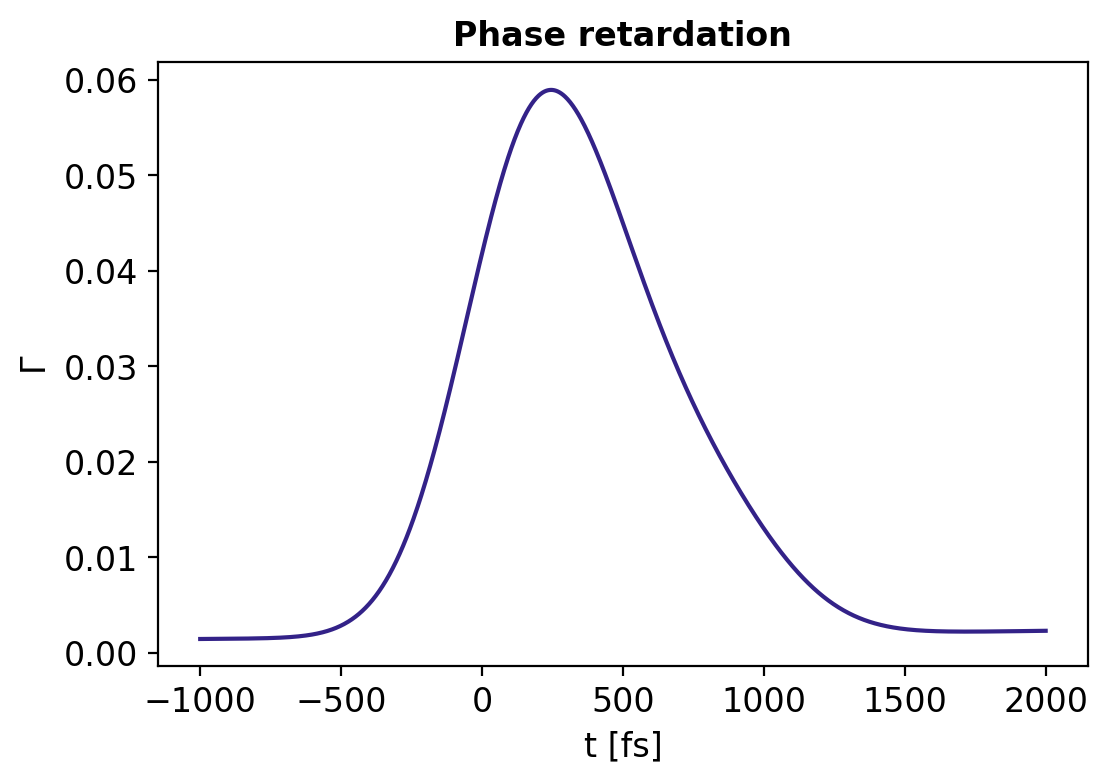

In [7]:
gamma_wit, t_gamma = phase_retard.phase_retard(Ec_wit, tt*1e-12, d_arr, tau, probe, gap, 'chirp', plot = True);

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


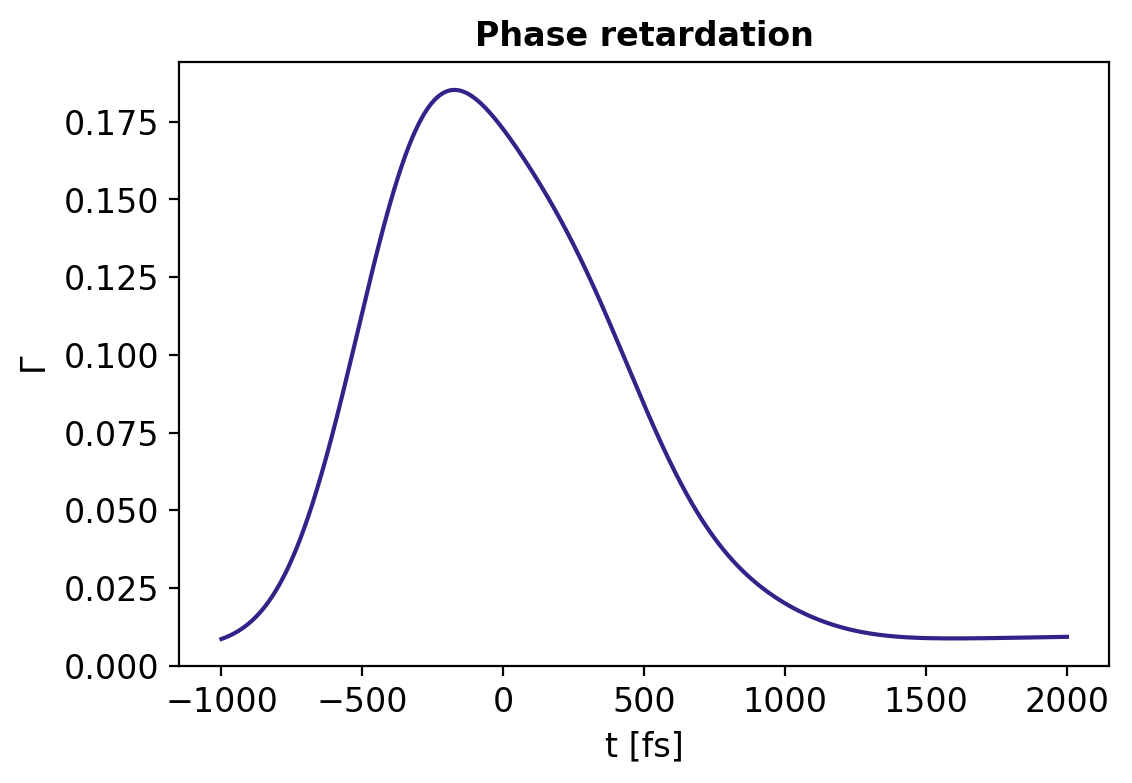

In [8]:
gamma, t_gamma = phase_retard.phase_retard(Ec, tt*1e-12, d_arr, tau, probe, gap, 'chirp', plot = True);

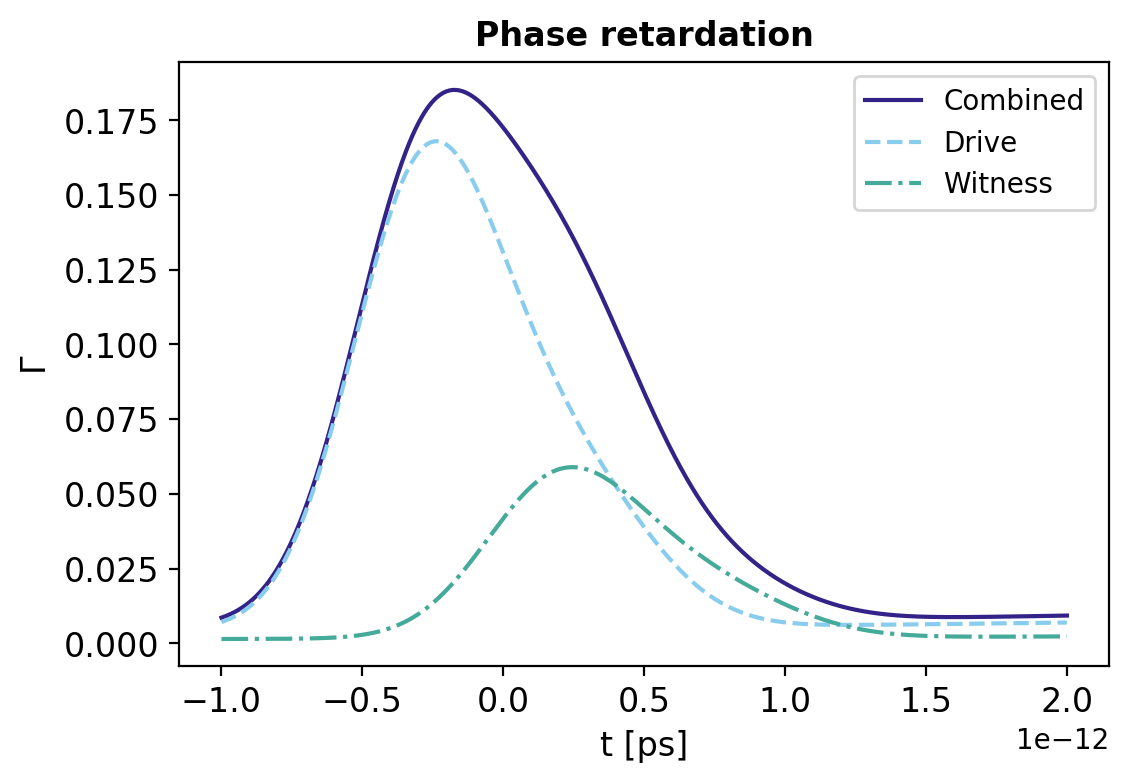

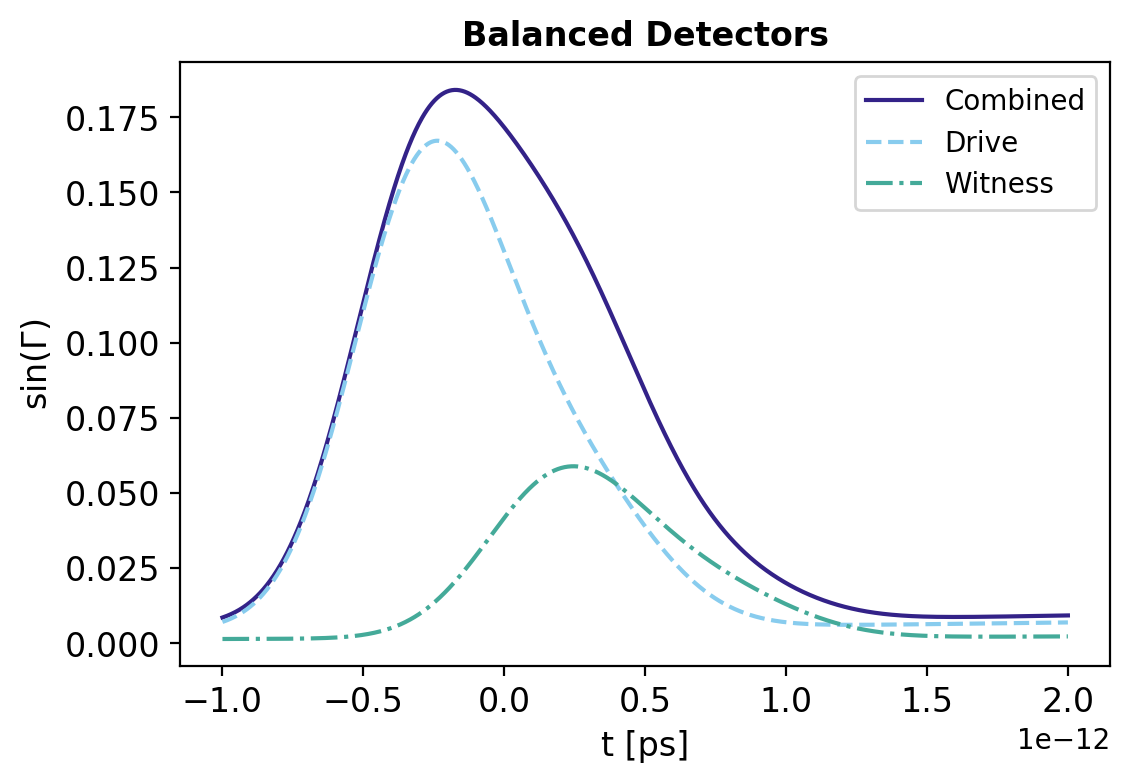

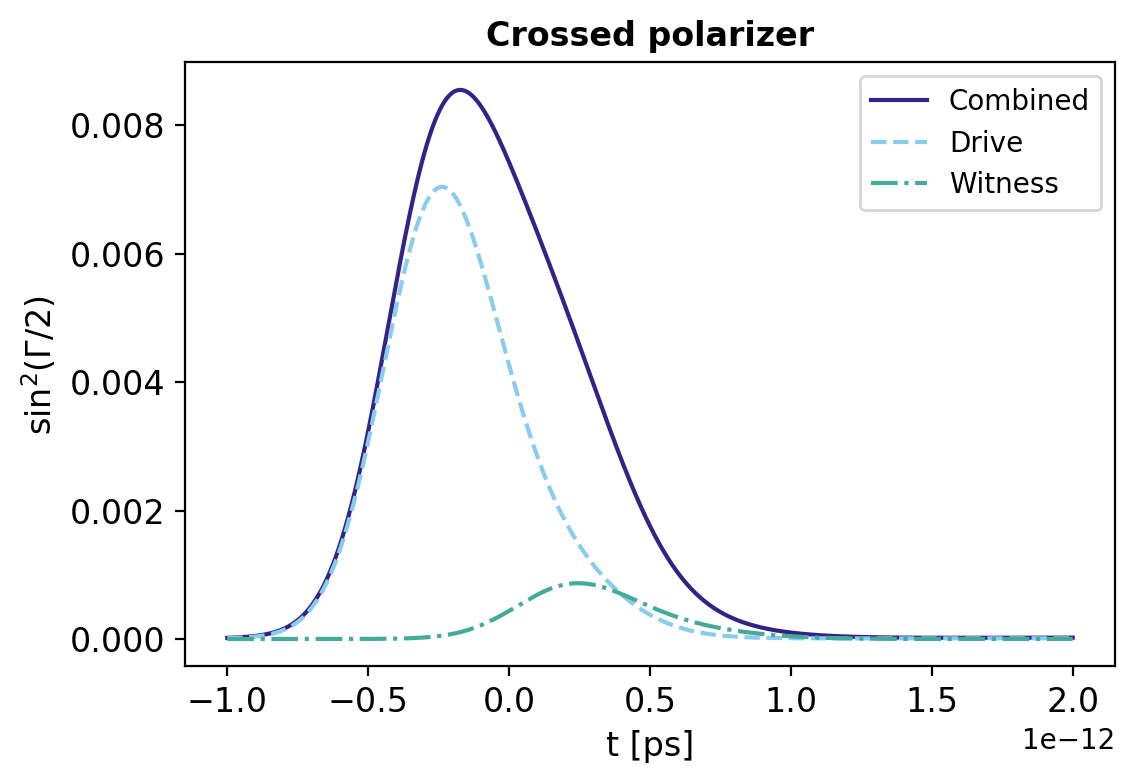

In [9]:
gammas = (gamma, gamma_drive, gamma_wit);
labels = ('Combined', 'Drive', 'Witness');
fig1, ax1 = makefig(xlab = 't [ps]', ylab = r'$\Gamma$', title = 'Phase retardation');
fig2, ax2 = makefig(xlab = 't [ps]', ylab = r'sin$(\Gamma)$', title = 'Balanced Detectors');
fig3, ax3 = makefig(xlab = 't [ps]', ylab = r'sin$^2(\Gamma/2)$', title = 'Crossed polarizer');

ax1.plot(t_gamma, (gammas[0]), label = labels[0])
ax1.plot(t_gamma, (gammas[1]), '--', label = labels[1])
ax1.plot(t_gamma, (gammas[2]), '-.', label = labels[2])

ax2.plot(t_gamma, np.sin(gammas[0]), label = labels[0])
ax2.plot(t_gamma, np.sin(gammas[1]), '--', label = labels[1])
ax2.plot(t_gamma, np.sin(gammas[2]), '-.', label = labels[2])

ax3.plot(t_gamma, np.sin(gammas[0]/2)**2, label = labels[0])
ax3.plot(t_gamma, np.sin(gammas[1]/2)**2, '--', label = labels[1])
ax3.plot(t_gamma, np.sin(gammas[2]/2)**2, '-.', label = labels[2])

ax1.legend();
ax2.legend();
ax3.legend();

plt.show()